 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv_path = (r"C:\Users\minha\OneDrive\Documents\Pandas_Portfolio_Analysis\Resources\whale_returns.csv")
whales_df = pd.read_csv(whale_csv_path)
whales_df.set_index(pd.to_datetime(whales_df["Date"], infer_datetime_format = True), inplace = True)
whales_df.drop(columns = ["Date"], inplace = True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df = whales_df.dropna().copy() 
whales_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv_path = (r"C:\Users\minha\OneDrive\Documents\Pandas_Portfolio_Analysis\Resources\algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path)
algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format = True), inplace = True)
algo_df.drop(columns = ["Date"], inplace = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy() 
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csv_path = (r"C:\Users\minha\OneDrive\Documents\Pandas_Portfolio_Analysis\Resources\sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv_path)
sp500_df.set_index(pd.to_datetime(sp500_df["Date"], infer_datetime_format = True), inplace = True)
sp500_df.drop(columns = ["Date"], inplace = True) 
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "", regex = True) 
sp500_df["Close"] = sp500_df["Close"].astype("float") 
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns  
daily_returns_df = sp500_df.pct_change()
daily_returns_df.head() 

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_df = sp500_df.dropna().copy() 
sp500_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_df = daily_returns_df.rename(columns = { 
    "Close" : "SP500 Daily Returns" 
}) 
daily_returns_df.head()

,SP500 Daily Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat([whales_df, algo_df, daily_returns_df], axis ='columns', join ='inner')
joined_data_cols.sort_index(ascending = True, inplace = True)  
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Portfolios'}, xlabel='Date'>

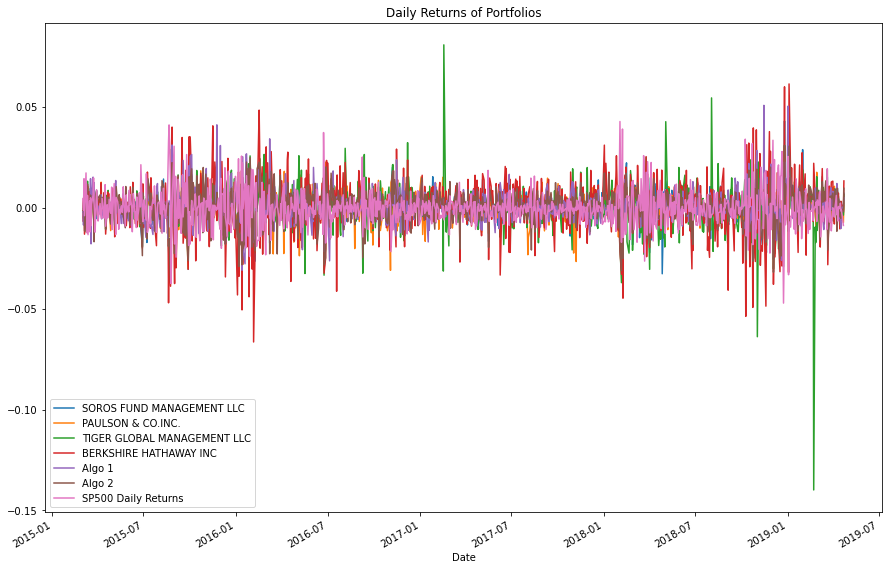

In [15]:
# Plot daily returns of all portfolios
joined_data_cols.plot(title = "Daily Returns of Portfolios", figsize = (15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Portfolios'}, xlabel='Date'>

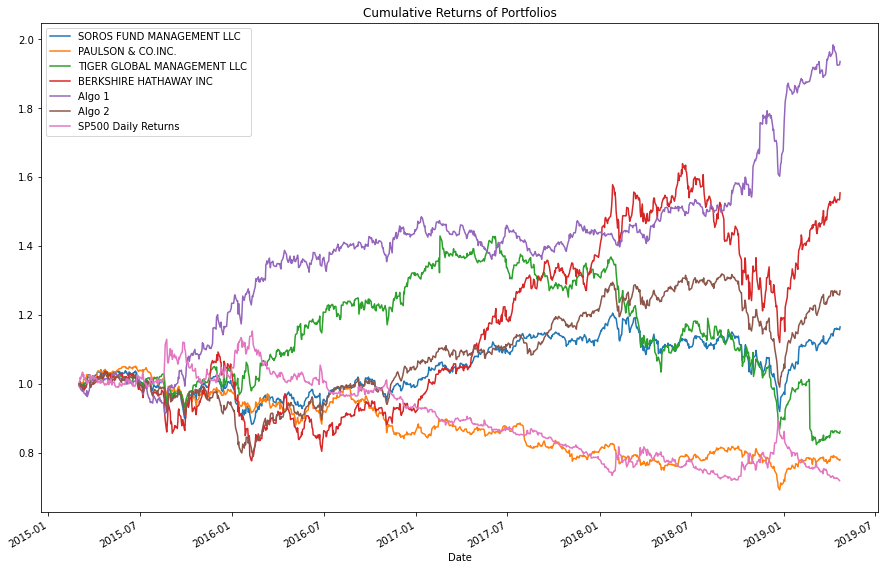

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_cols).cumprod()
# Plot cumulative returns
cumulative_returns.plot(title = "Cumulative Returns of Portfolios", figsize = (15,10))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

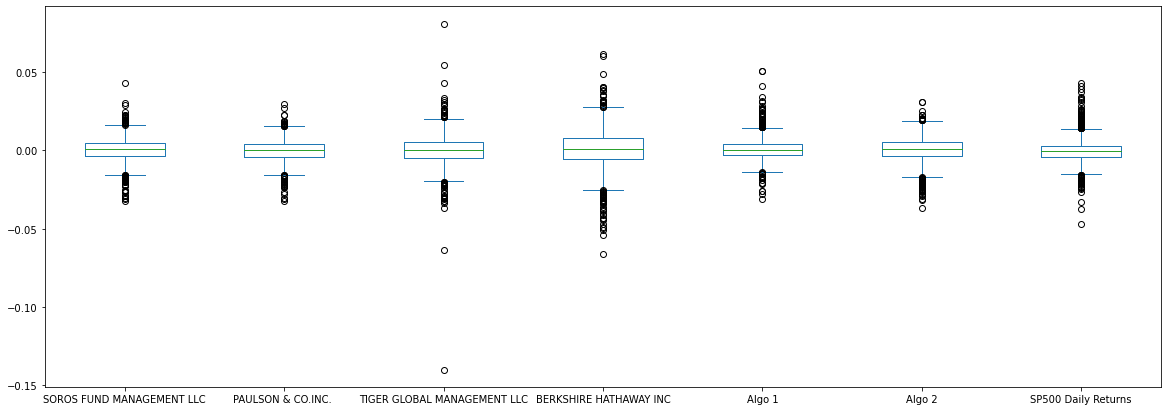

In [17]:
# Box plot to visually show risk
joined_data_cols.plot(kind = "box", figsize = (20, 7))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
joined_data_std = joined_data_cols.std().sort_values(ascending = False)
joined_data_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500 Daily Returns            0.008587
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Determine which portfolios are riskier than the S&P 500
""" Berkshire Hathaway INC and Tiger Global Management LLC are riskier than the S&P 500 """ 
is_portfolios_riskier_sp500 = [joined_data_std["SP500 Daily Returns"] < joined_data_std]
is_portfolios_riskier_sp500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 SP500 Daily Returns            False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_std * np.sqrt(252)
annualized_std.sort_values(ascending = False) 

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500 Daily Returns            0.136313
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Date'>

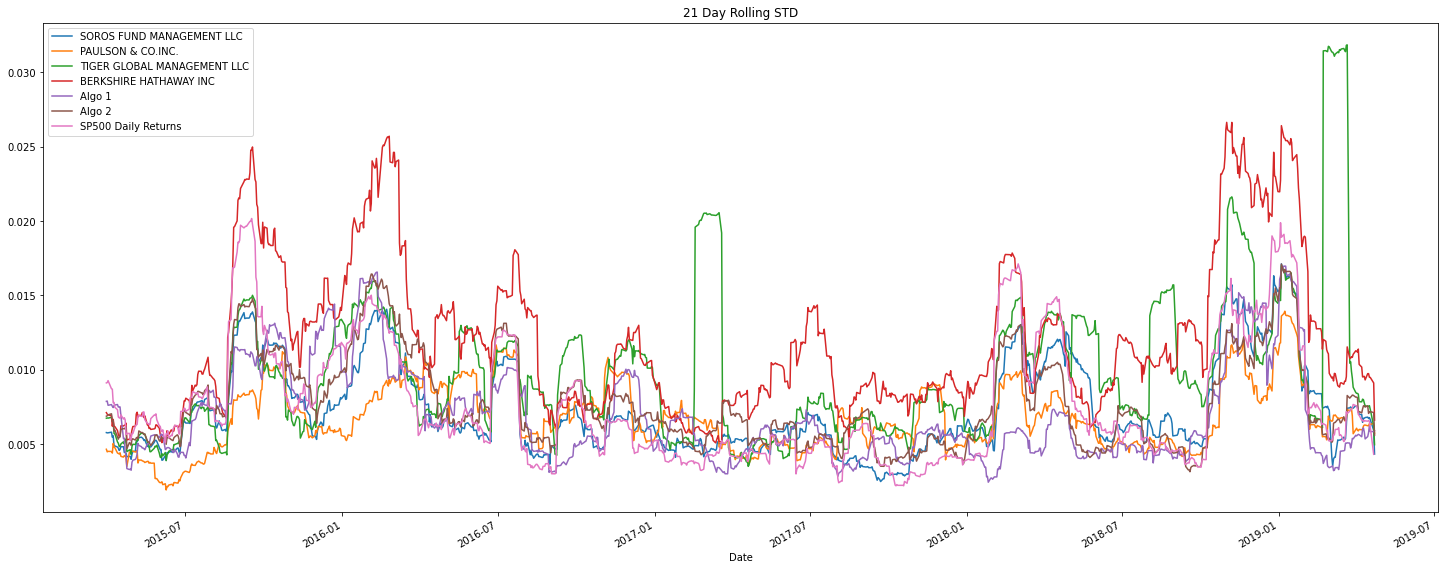

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data_cols.rolling(window = 21).std().plot(title = "21 Day Rolling STD", figsize = (25,10))

### Calculate and plot the correlation

<AxesSubplot:>

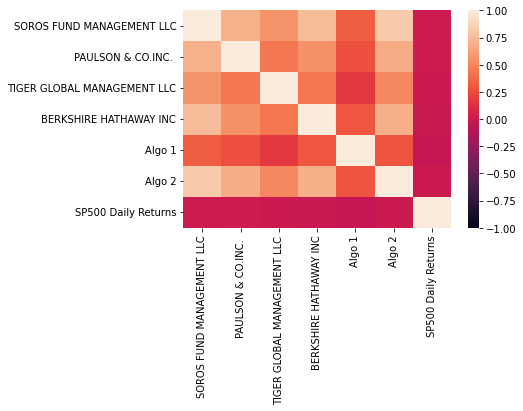

In [22]:
# Calculate the correlation
correlation = joined_data_cols.corr()

# Display correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1) 

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 Rolling 60-Day Beta compared to the SP500'}, xlabel='Date'>

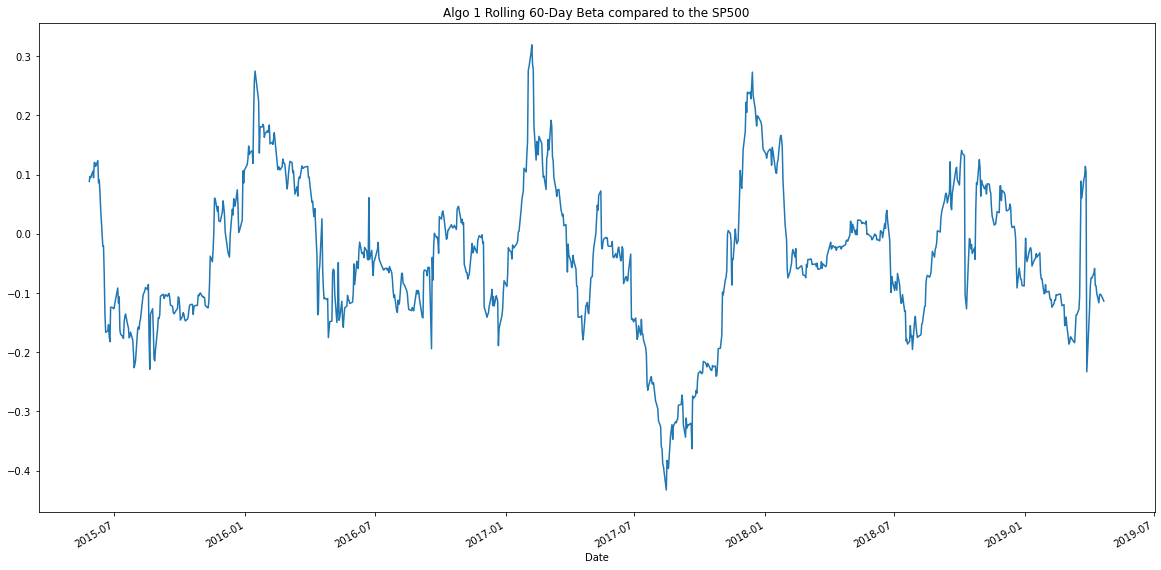

In [23]:
# Calculate covariance of a single portfolio
algo1_rolling_covariance = joined_data_cols["Algo 1"].rolling(window = 60).cov(joined_data_cols["SP500 Daily Returns"]) 

# Calculate variance of S&P 500
sp500_rolling_variance = joined_data_cols["SP500 Daily Returns"].rolling(window = 60).var() 

# Computing beta
algo1_rolling_beta = algo1_rolling_covariance / sp500_rolling_variance

# Plot beta trend
algo1_rolling_beta.plot(title = "Algo 1 Rolling 60-Day Beta compared to the SP500", figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

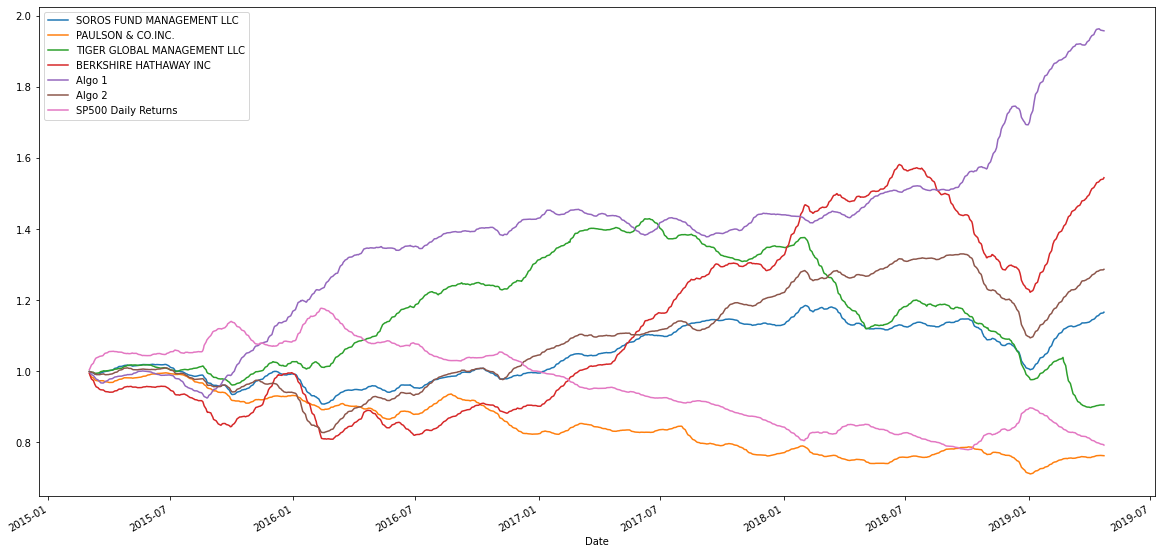

In [24]:
# Use `ewm` to calculate the rolling window
ewm_portfolios = joined_data_cols.ewm(span = 21, adjust = False).mean() 
(1 + ewm_portfolios).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratio = (joined_data_cols.mean() * 252) / (joined_data_cols.std() * np.sqrt(252))
sharpe_ratio 

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Daily Returns           -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Portfolios'}>

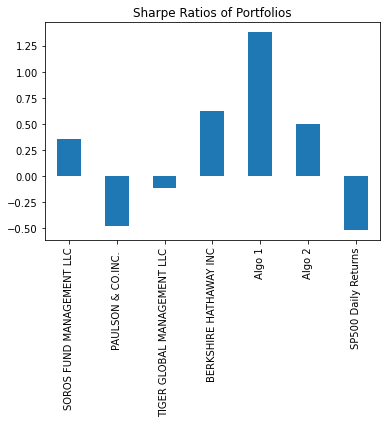

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios of Portfolios") 

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

##### --- Algo 1 outperformed the whale portfolios [Berkshire Hathaway, Soros Fund Management, Paulson & CO INC, Tiger Global Management] and the SP500 daily returns. 
##### --- Algo 2 outperformed the whale portfolios [Soros Fund Management, Paulson & CO INC, Tiger Global Management] and the SP500 daily returns. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock (APPLE INC)
aapl_df = pd.read_csv(Path(r"C:\Users\minha\OneDrive\Documents\Pandas_Portfolio_Analysis\Resources\AAPL_price_history.csv"))
aapl_df.set_index(pd.to_datetime(aapl_df["Date"], infer_datetime_format = True), inplace = True)
aapl_df = aapl_df.drop(["Date", "Open", "High", "Low", "Adj Close", "Volume"], axis = 1)
aapl_df.rename(columns={"Close":"AAPL"}, inplace = True)
aapl_df.head()

,AAPL
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [28]:
# Reading data from 2nd stock (AMD Micro Devices INC) 
amd_df = pd.read_csv(Path(r"C:\Users\minha\OneDrive\Documents\Pandas_Portfolio_Analysis\Resources\AMD_price_history.csv"))
amd_df.set_index(pd.to_datetime(amd_df["Date"], infer_datetime_format = True), inplace = True) 
amd_df = amd_df.drop(["Date", "Open", "High", "Low", "Adj Close", "Volume"], axis = 1) 
amd_df.rename(columns={"Close":"AMD"}, inplace = True)
amd_df.head()

,AMD
Date,
2018-01-31,13.74
2018-02-01,13.25
2018-02-02,12.45
2018-02-05,11.57
2018-02-06,11.65


In [29]:
# Reading data from 3rd stock (COINBASE Global INC)
mrna_df = pd.read_csv(Path(r"C:\Users\minha\OneDrive\Documents\Pandas_Portfolio_Analysis\Resources\MRNA_price_history.csv"))
mrna_df.set_index(pd.to_datetime(mrna_df["Date"], infer_datetime_format = True), inplace = True) 
mrna_df = mrna_df.drop(["Date", "Open", "High", "Low", "Adj Close", "Volume"], axis = 1) 
mrna_df.rename(columns={"Close":"MRNA"}, inplace = True)
mrna_df.head() 

,MRNA
Date,
2018-12-10,18.799999
2018-12-11,18.010000
2018-12-12,18.680000
2018-12-13,18.760000
2018-12-14,18.320000


In [30]:
# Combine all stocks in a single DataFrame
my_portfolio_stocks = pd.concat((aapl_df, amd_df, mrna_df), axis = 1, join = "inner") 
my_portfolio_stocks.sort_index(ascending = True, inplace = True) 

# Reset Date index
my_portfolio_stocks.index = my_portfolio_stocks.index.normalize()

my_portfolio_stocks.head() 

,AAPL,AMD,MRNA
Date,,,
2018-12-10,42.400002,19.990000,18.799999
2018-12-11,42.157501,19.980000,18.010000
2018-12-12,42.275002,20.480000,18.680000
2018-12-13,42.737499,19.860001,18.760000
2018-12-14,41.369999,19.900000,18.320000


In [31]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_stocks.pct_change()

# Drop NAs
my_portfolio_returns.dropna(inplace = True) 

# Display sample data
my_portfolio_returns.head()

,AAPL,AMD,MRNA
Date,,,
2018-12-11,-0.005719,-0.000500,-0.042021
2018-12-12,0.002787,0.025025,0.037202
2018-12-13,0.010940,-0.030273,0.004283
2018-12-14,-0.031998,0.002014,-0.023454
2018-12-17,-0.009306,-0.053769,-0.072052


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_weighted_returns  = my_portfolio_returns.dot(weights)
my_portfolio_weighted_returns  = my_portfolio_weighted_returns.rename("Custom Portfolio")

# Display sample data
my_portfolio_weighted_returns.head()

Date
2018-12-11   -0.016080
2018-12-12    0.021671
2018-12-13   -0.005017
2018-12-14   -0.017813
2018-12-17   -0.045042
Name: Custom Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio_returns = pd.concat([joined_data_cols, my_portfolio_weighted_returns], axis = 'columns', join ='inner')

In [34]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio_returns.dropna(inplace = True) 
joined_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns,Custom Portfolio
Date,,,,,,,,
2018-12-11,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542,-0.005390,-0.016080
2018-12-12,0.009128,0.008147,0.002798,0.017475,0.002048,0.006321,0.000200,0.021671
2018-12-13,-0.006231,-0.005056,0.000476,-0.004340,-0.012556,-0.010408,0.019458,-0.005017
2018-12-14,-0.007269,-0.012273,-0.020367,-0.015391,-0.007552,-0.013574,0.021214,-0.017813
2018-12-17,-0.020119,-0.009837,-0.016709,-0.031663,0.001624,-0.025080,-0.000086,-0.045042
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.011039
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.019222
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.002685


## Re-run the risk analysis with your portfolio to see how it compares to the others

<AxesSubplot:title={'center':'Custom Port -- Daily Returns'}, xlabel='Date'>

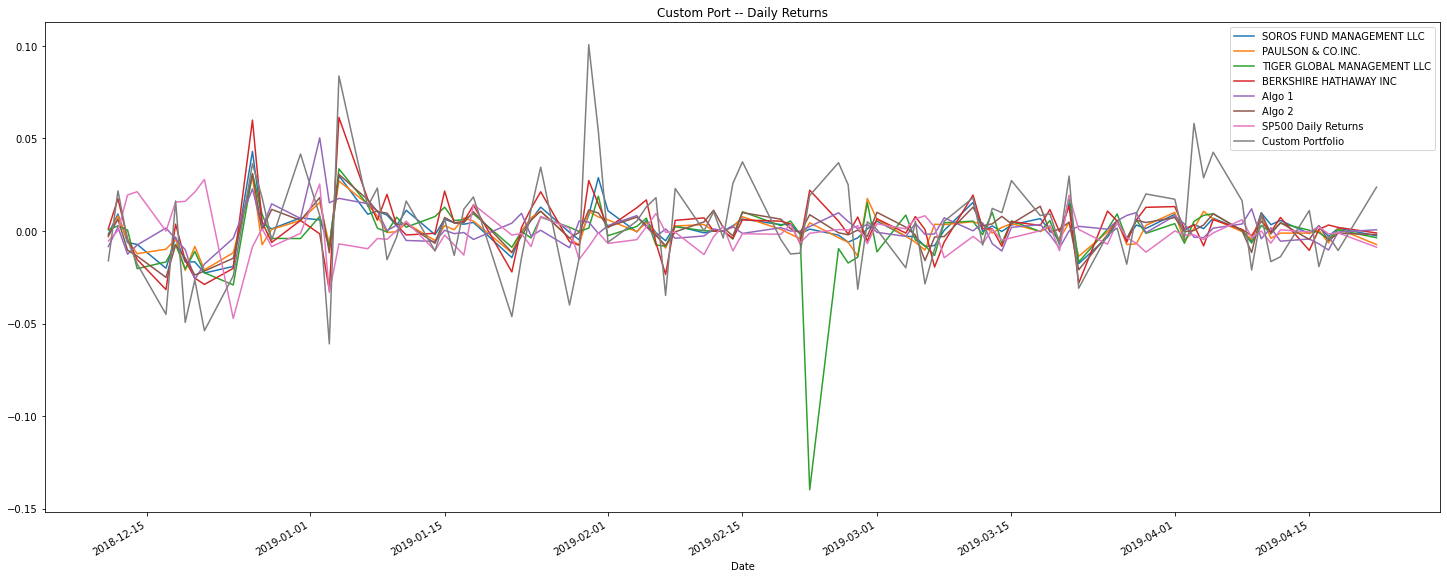

In [35]:
joined_portfolio_returns.plot(title="Custom Port -- Daily Returns" , figsize=(25,10))

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
custom_port_annual_std = joined_portfolio_returns.std() * np.sqrt(252)
custom_port_annual_std.sort_values(ascending = False)

Custom Portfolio               0.432772
TIGER GLOBAL MANAGEMENT LLC    0.284631
BERKSHIRE HATHAWAY INC         0.239000
SP500 Daily Returns            0.166327
Algo 2                         0.155558
SOROS FUND MANAGEMENT LLC      0.153852
Algo 1                         0.142697
PAULSON & CO.INC.              0.134061
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Date'>

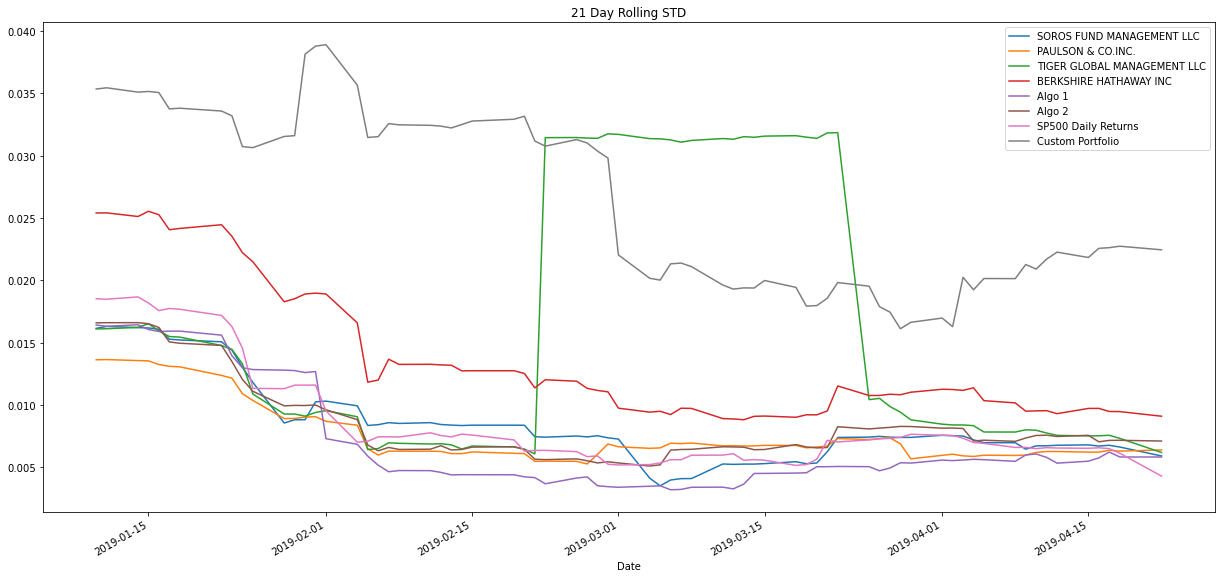

In [37]:
# Calculate rolling standard deviation & Plot rolling standard deviation
joined_portfolio_returns.rolling(window = 21).std().plot(title = "21 Day Rolling STD", figsize = (21,10))

### Calculate and plot the correlation

<AxesSubplot:>

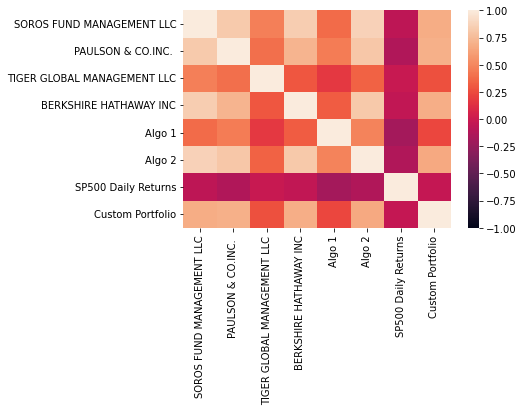

In [38]:
# Calculate and plot the correlation
custom_port_correlation = joined_portfolio_returns.corr() 
sns.heatmap(custom_port_correlation, vmin = -1, vmax = 1) 

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Rolling 60-Day Beta compared to the SP500'}, xlabel='Date'>

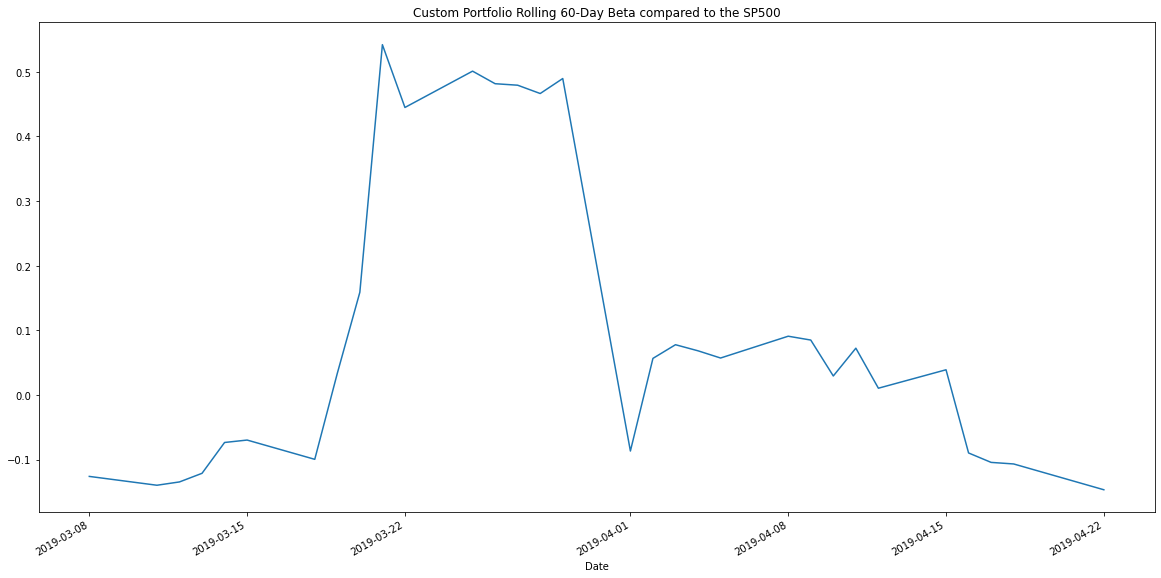

In [39]:
# Calculate and plot Beta
custom_port_rolling_covariance = joined_portfolio_returns["Custom Portfolio"].rolling(window = 60).cov(joined_portfolio_returns["SP500 Daily Returns"]) 
custom_port_rolling_variance = joined_portfolio_returns["SP500 Daily Returns"].rolling(window = 60).var() 

rolling_beta = custom_port_rolling_covariance / custom_port_rolling_variance

rolling_beta.plot(title = "Custom Portfolio Rolling 60-Day Beta compared to the SP500", figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
custom_port_sharpe_ratio = (joined_portfolio_returns.mean() * 252) / (joined_portfolio_returns.std() * np.sqrt(252)) 

<AxesSubplot:title={'center':'Sharp Ratio of Portfolios'}>

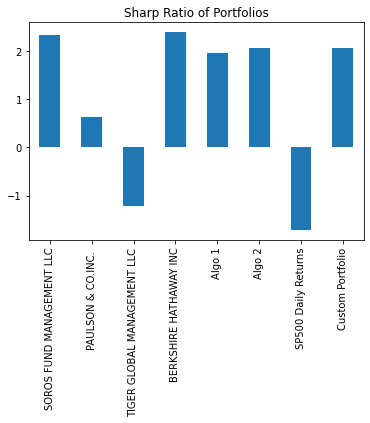

In [41]:
# Visualize the sharpe ratios as a bar plot
custom_port_sharpe_ratio.plot(kind = "bar", title = "Sharp Ratio of Portfolios")

### How does your portfolio do?

##### --- My custom portfolio outperformed Algo 1, the SP500 Daily Returns, and the whale portfolios: "Paulson & CO, Tiger Management".